## **Gestión de Inversiones con Python** 🚀
### **Sesión 3: Gestión de Datos Financieros**
**Andrés C. Medina Sanhueza**

Senior Datascientist Engineer - Advanced Analytics / Fintech Services @ Mercadolibre

anmedinas@gmail.com

### **`Análisis Exploratorio de Datos`**

El analisis exploratorio de datos (siglas en ingles `EDA`), consiste en el proceso inicial para comprender las caracteristicas principales de un conjunto de datos previo a aplicar algoritmos de `aprendizaje supervisado` y `no supervisado`. Principalmente, este análisis busca obtener información relevante, identificar patrones, detectar anomalías y formular hipótesis sobre los datos. Algunas etapas, son las siguientes. 

1. **`Resumen Estadístico de las variables`** Se calculan medidas de tendencia central como la media, mediana, moda, desviación estándar, percentiles, y rango para entender la distribución de cada variable (en python, esto se hace mediante `df.describe()`). Por otro lado, se pueden observar asimetrías, kurtosis, y valores atípicos (`outliers`).

2. **`Visualización de Datos`** Las visualizaciones ayudan a identificar patrones, relaciones y tendencias en los datos. Algunas herramientas comunes son histogramas, gráficos de caja (`boxplots`), gráficos de dispersión, diagramas de barras, diagramas de violín (`violinplot`) y mapas de calor (`heatmaps`). 

3. **`Análisis de relaciones entre variables`** Se analizan las correlaciones entre variables numéricas (matriz de correlación) para entender cómo se relacionan entre sí. En el caso de variables categóricas, se pueden emplear tablas de contingencia para ver cómo se distribuyen los valores entre diferentes categorías.

4. **`Tratamiento de datos faltantes`**  Es común en `EDA` identificar y manejar los datos faltantes. Se pueden rellenar, eliminar o utilizar técnicas específicas según la cantidad y el impacto de los datos faltantes (algunas tecnicas mas comunes de imputacion, son la calcular la media, ó medias moviles)

5. **`Deteccion de anomalías u outliers`** Los valores atípicos pueden afectar los resultados del análisis y el desempeño de los modelos. El `EDA` ayuda a detectarlos y a decidir si se deben eliminar o tratar de alguna forma.

6. **`Transformación de Datos`** En algunos casos, es necesario transformar las variables (como normalización o estandarización) para facilitar el análisis y mejorar el rendimiento de los modelos. También se pueden aplicar transformaciones logarítmicas, raíz cuadrada, entre otras, para lograr distribuciones más simétricas en datos muy sesgados (algunas muy útiles para lograr que las series sean estacionarias).

7. **`Creación de variables derivadas`** A través del `EDA`, se identifican posibles nuevas variables que puedan aportar información adicional, combinando o transformando variables existentes.

#### **`1.1. Análisis Descriptivo`**

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

/Users/ndmedina/Personales/ML_Finance/Datascience_Finance/ds_finnace_usach_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
ticker = 'AAPL'
df = yf.download(ticker, start = '2015-01-01', end = '2024-01-01')['Close']
df.describe()

[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
count,2264.000000
mean,84.026440
std,56.034699
min,22.584999
25%,35.439376
50%,53.868752
75%,141.710003
max,198.110001


#### **`1.2. Visualización Serie de Tiempo`**

In [3]:
from matplotlib import pyplot as plt 
import scipy.stats as stats
import seaborn as sns 
sns.set_style("dark")

In [4]:
def analyze_price_series(ticker, start_date, end_date):
    """
    Genera visualizaciones de una serie de tiempo (Serie, Densidad y QQplot)
    
    parameters:
    - ticker : Simbolo de la accion que descargaran (AAPL)
    - start_date : Fecha de inicio (yyyy-mm-dd) 
    - end_date : Fecha de termino (yyyy-mm-dd)

    return:
    - Devuelve la visualizacion en una grilla 
    """

    # Extraer datos desde yfinance con ticker
    data = yf.download(ticker, start = start_date, end = end_date)['Adj Close']
    
    # Convierte a Serie unidimensional si es un DataFrame
    data = data.squeeze()  
    
    fig, axes = plt.subplots(1, 3, figsize=(16, 8))
    
    # Serie de tiempo
    axes[0].plot(data, color = 'blue')
    axes[0].set_title(f'Serie de Precios de {ticker}')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Adjusted Close Price')
    
    # Histograma como densidad
    sns.histplot(data, kde = True, ax = axes[1], color = 'blue')
    axes[1].set_title(f'Histograma y Densidad de Precios de {ticker}')
    axes[1].set_xlabel('Adjusted Close Price')
    axes[1].set_ylabel('Density')
    
    # QQ-Plot
    stats.probplot(data, dist = "norm", plot = axes[2])
    axes[2].set_title(f'QQ-Plot de Precios {ticker}')
    
    plt.tight_layout()
    plt.show()



[*********************100%***********************]  1 of 1 completed


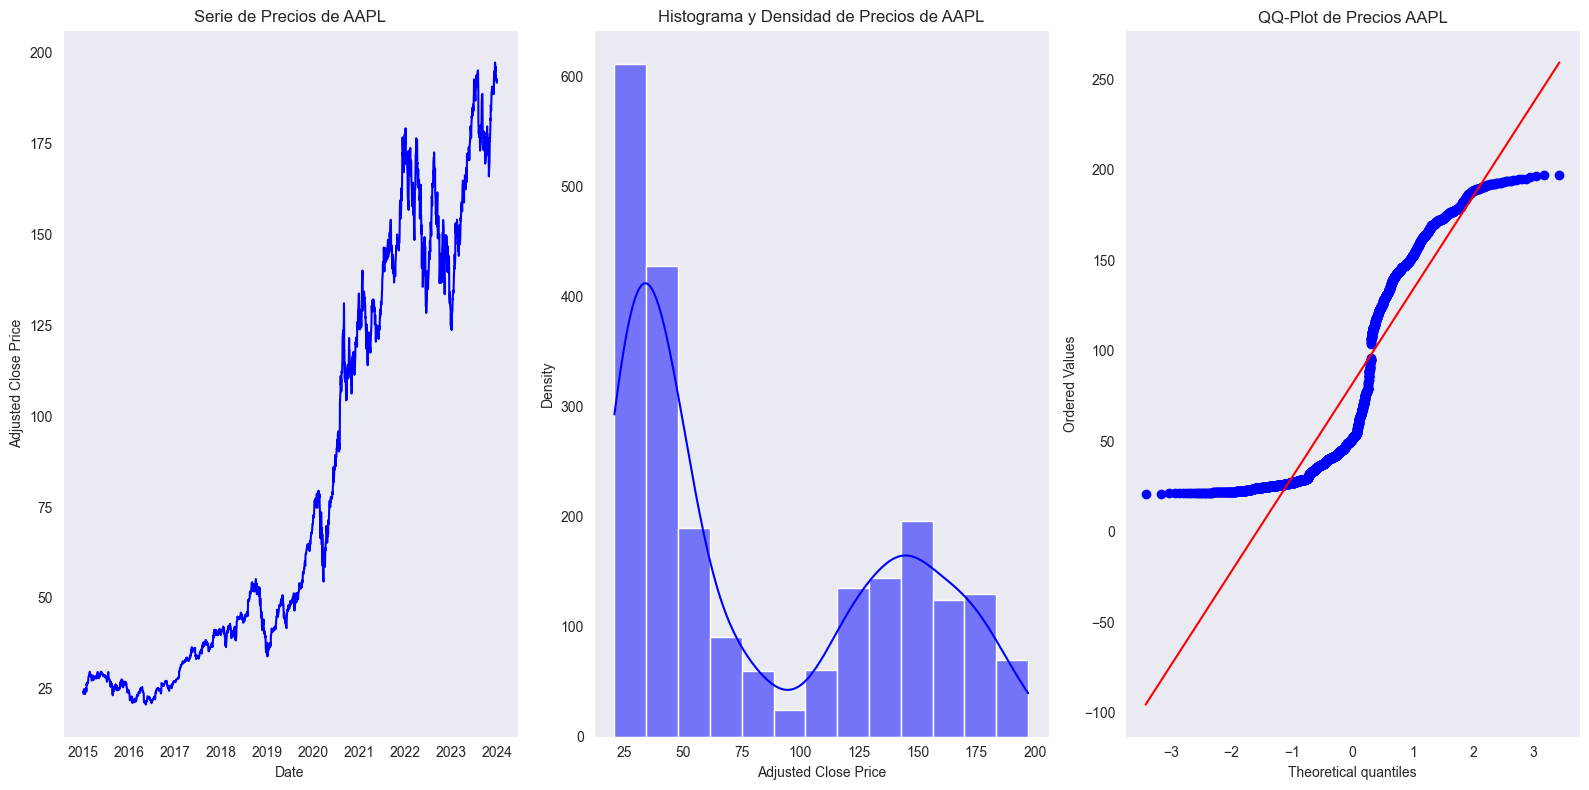

In [5]:
# Utilizo la funcion con Ticker y Fechas de inicio y termino
analyze_price_series(ticker = 'AAPL', start_date = '2015-01-01', end_date = '2024-01-01')

#### **`1.3. Descomposición de Series`**

Las series de tiempo, suelen descomponerse en cuatro componentes.

* `Tendencia` ($T$): Componente de largo plazo que muestra la dirección general de los datos.

* `Estacionalidad` ($S$): Componente que muestra patrones regulares y predecibles que se repiten en intervalos fijos de tiempo.

* `Ciclo` ($C$): Componente que muestra fluctuaciones irregulares en los datos a largo plazo que no son estacionales.

* `Ruido` ($N$): Componente aleatorio que no se puede explicar por los otros componentes.

Esto se puede expresar como un `modelo aditivo`:

$$
Y_t = T_t + S_t + C_t + N_t
$$

Sin embargo, si la amplitud de las fluctuaciones estacionales aumenta o disminuye conforme cambia el nivel de la serie temporal, se debe considerar un `modelo multiplicativo`.

$$
Y_t = T_t \cdot S_t \cdot C_t \cdot N_t
$$

La diferencia entre ambos enfoques, radica en lo siguiente : 

* En un `modelo aditivo`, los componentes (tendencia, estacionalidad, residuo) se suman. Este modelo es apropiado cuando las fluctuaciones estacionales son constantes en términos absolutos.

* En cambio, en un `modelo multiplicativo`, los componentes (tendencia, estacionalidad y residuos) se multiplican. Este modelo es apropiado cuando las fluctuaciones estacionales son proporcionales al nivel de la serie temporal.

<Figure size 1400x1000 with 0 Axes>

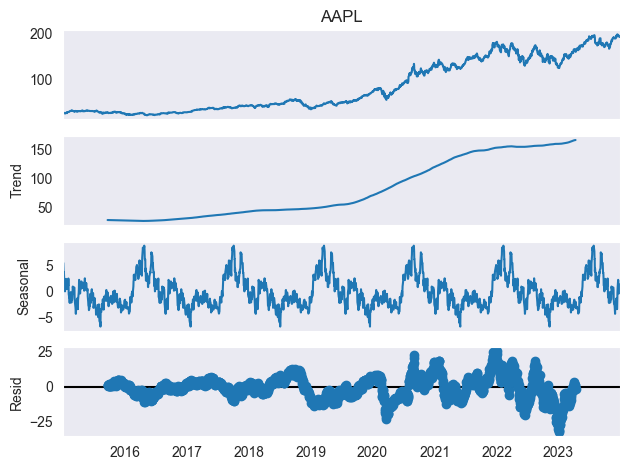

In [6]:
import statsmodels.api as sm

# Descomposición de la serie de tiempo (periodicidad diaria)
decomposition = sm.tsa.seasonal_decompose(df.AAPL, model = 'additive', period = 365)

# Visualizar la descomposición
plt.figure(figsize = (14, 10))
decomposition.plot()
plt.show()

<Figure size 1400x1000 with 0 Axes>

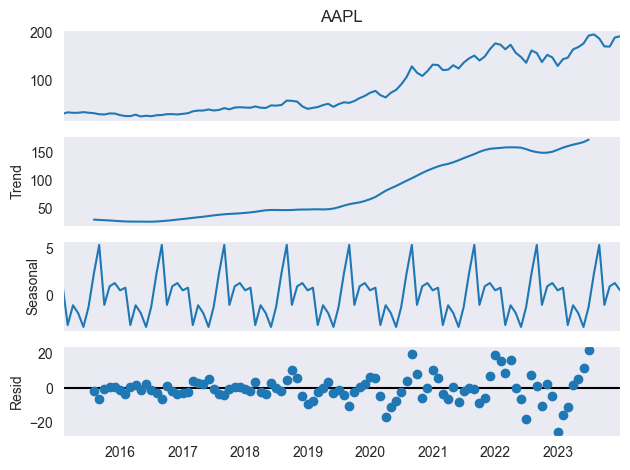

In [7]:
# Solo considero serie mensual (ultima observacion del mes)
df_m = df['AAPL'].resample('ME').last()

# Descomposición de la serie de tiempo (periodicidad mensual)
decomposition = sm.tsa.seasonal_decompose(df_m, model = 'additive', period = 12)

plt.figure(figsize=(14, 10))
decomposition.plot()
plt.show()

<Figure size 1400x1000 with 0 Axes>

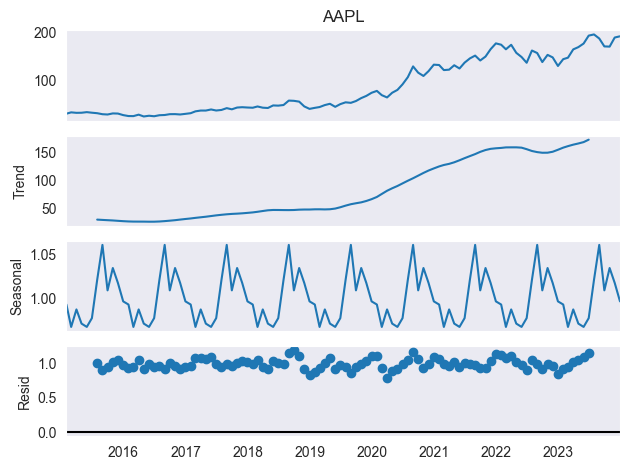

In [8]:
# Solo considero serie mensual (ultima observacion del mes)
df_m = df['AAPL'].resample('ME').last()

# Descomposición de la serie de tiempo (periodicidad mensual)
decomposition = sm.tsa.seasonal_decompose(df_m, model = 'multiplicative', period = 12)

plt.figure(figsize=(14, 10))
decomposition.plot()
plt.show()

#### **`1.4. Boxplots`**

Un `boxplot` o `diagrama de caja` es una representación gráfica de la distribución de un conjunto de datos, diseñada para mostrar la variabilidad, la simetría, y los posibles valores atípicos (outliers) en los datos.

Componentes:
* **`Caja`**
    * La caja representa el rango intercuartílico (IQR), que abarca desde el primer cuartil (Q1) hasta el tercer cuartil (Q3), donde se encuentra el 50% central de los datos.
    * La línea central dentro de la caja representa la mediana (Q2), que divide los datos en dos partes iguales.

* **`Bigotes`** 
    * Los bigotes se extienden desde los bordes de la caja hasta el valor más extremo que no se considera un outlier.
    * Por convención, los bigotes se extienden hasta $Q_{1}-1.5\cdot\hbox{IQR}$ y $Q_{3}+1.5\cdot\hbox{IQR}$
    * Cualquier punto fuera de este rango se considera un outlier.

* **`Outliers`**
    * Los valores que se encuentran fuera del rango de los bigotes se representan como puntos individuales y se consideran outliers. Estos puntos indican observaciones inusualmente altas o bajas respecto al resto de los datos.

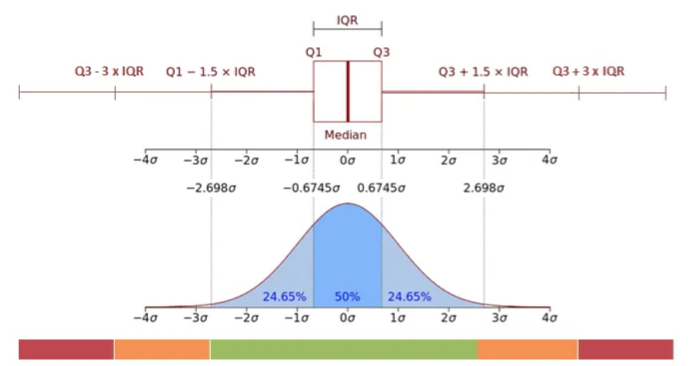

In [9]:
from IPython.display import Image
Image("boxplot.png")

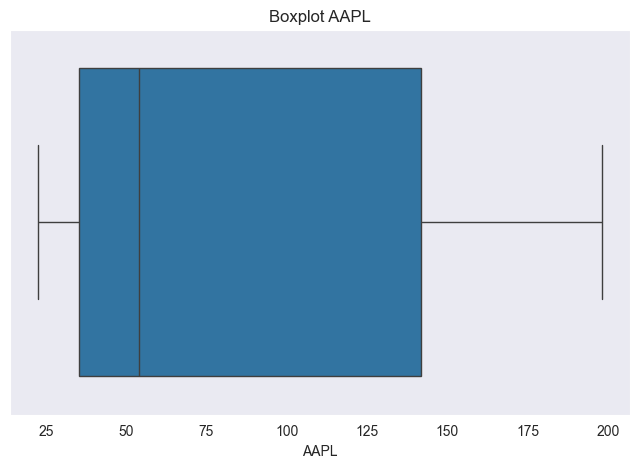

In [10]:
plt.figure(figsize = (8, 5))
sns.boxplot(data = df['AAPL'], orient = 'h')
plt.title('Boxplot AAPL')
plt.show()

In [11]:
data = df_m.to_frame().reset_index()
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month

In [12]:
data.head()

,Date,AAPL,year,month
0,2015-01-31 00:00:00+00:00,29.290001,2015,1
1,2015-02-28 00:00:00+00:00,32.115002,2015,2
2,2015-03-31 00:00:00+00:00,31.107500,2015,3
3,2015-04-30 00:00:00+00:00,31.287500,2015,4
4,2015-05-31 00:00:00+00:00,32.570000,2015,5


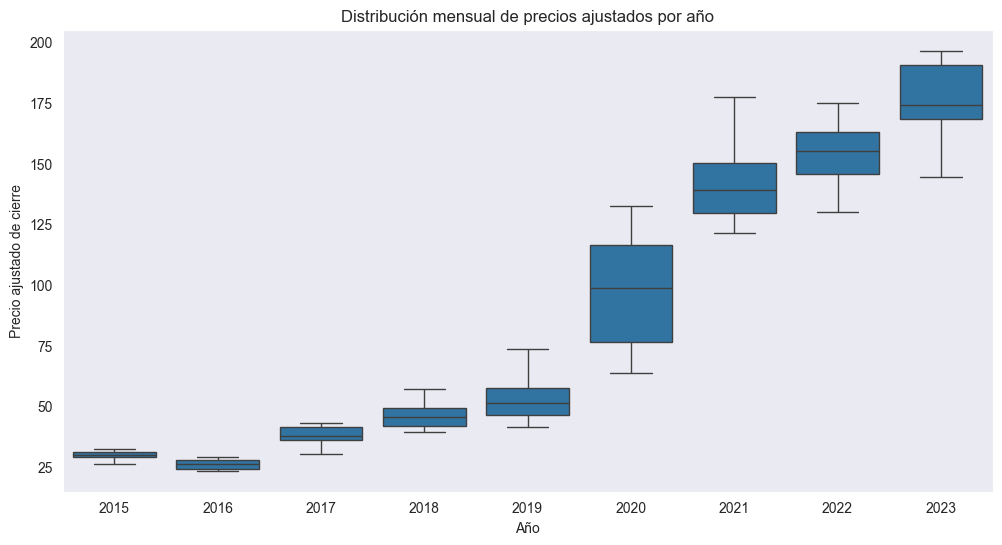

In [13]:
# Generar el boxplot por año
plt.figure(figsize = (12, 6))
sns.boxplot(x='year', y='AAPL', data = data)
plt.title('Distribución mensual de precios ajustados por año')
plt.xlabel('Año')
plt.ylabel('Precio ajustado de cierre')
plt.show()

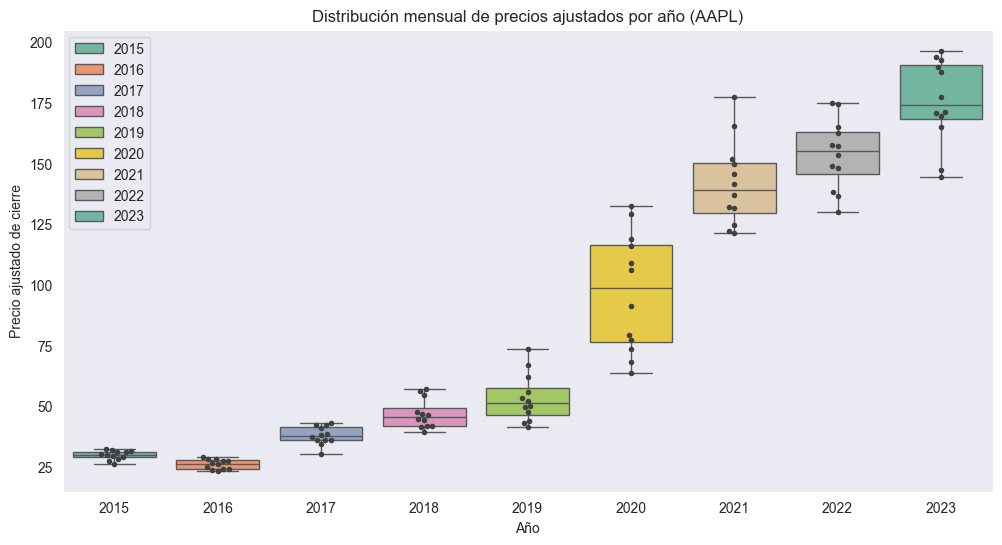

In [14]:
plt.figure(figsize = (12, 6))

# Generar boxplot y agregar swarmplot para observar las observaciones individuales
sns.boxplot(x = 'year', y = 'AAPL', data = data , hue = 'year', palette = 'Set2')
sns.swarmplot(x = 'year', y = 'AAPL', data = data, color = ".25", size = 4)
plt.title('Distribución mensual de precios ajustados por año (AAPL)')
plt.xlabel('Año')
plt.ylabel('Precio ajustado de cierre')
plt.show()

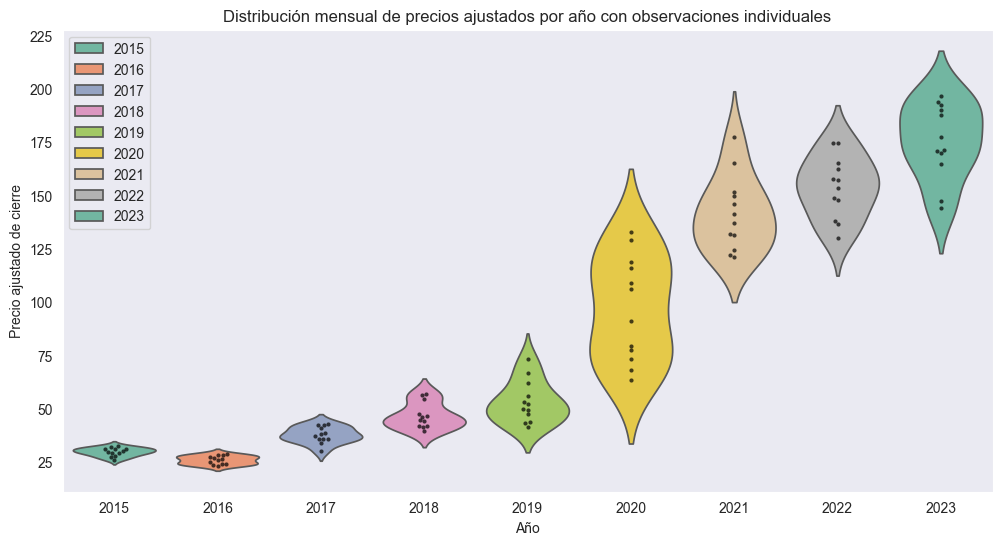

In [15]:
plt.figure(figsize=(12, 6))
sns.violinplot(x = 'year', y = 'AAPL', data = data, palette = "Set2", inner = None, hue = 'year')
sns.swarmplot(x='year', y = 'AAPL', data = data, color = "k", size = 3, alpha = 0.7)
plt.title('Distribución mensual de precios ajustados por año con observaciones individuales')
plt.xlabel('Año')
plt.ylabel('Precio ajustado de cierre')
plt.show()

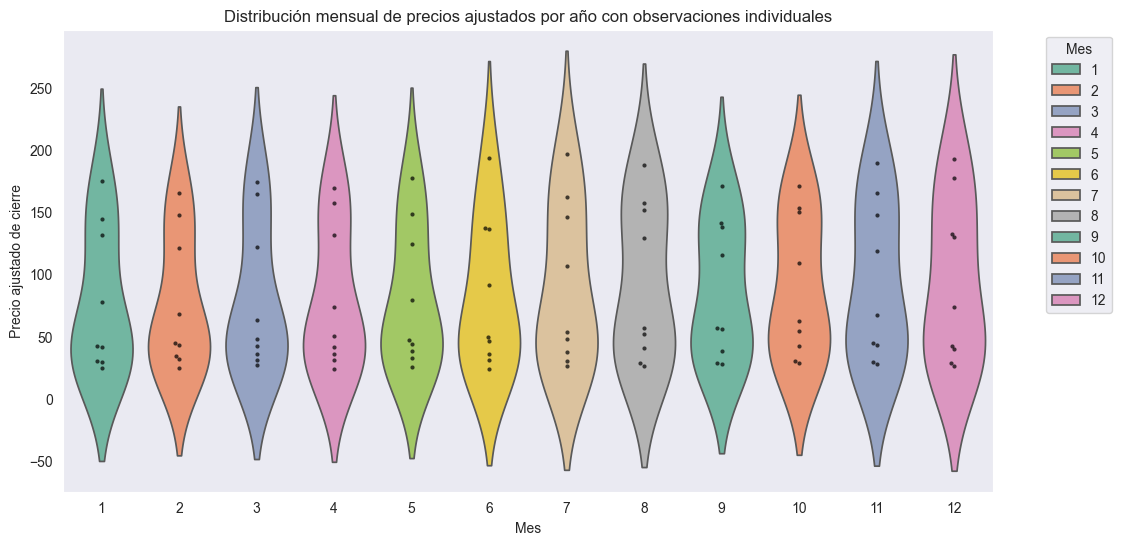

In [16]:
plt.figure(figsize=(12, 6))
sns.violinplot(x = 'month', y = 'AAPL', data = data, palette = "Set2", inner = None, hue = 'month')
sns.swarmplot(x = 'month', y = 'AAPL', data = data, color = "k", size = 3, alpha = 0.7)
plt.title('Distribución mensual de precios ajustados por año con observaciones individuales')
plt.xlabel('Mes')
plt.ylabel('Precio ajustado de cierre')
plt.legend(title='Mes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

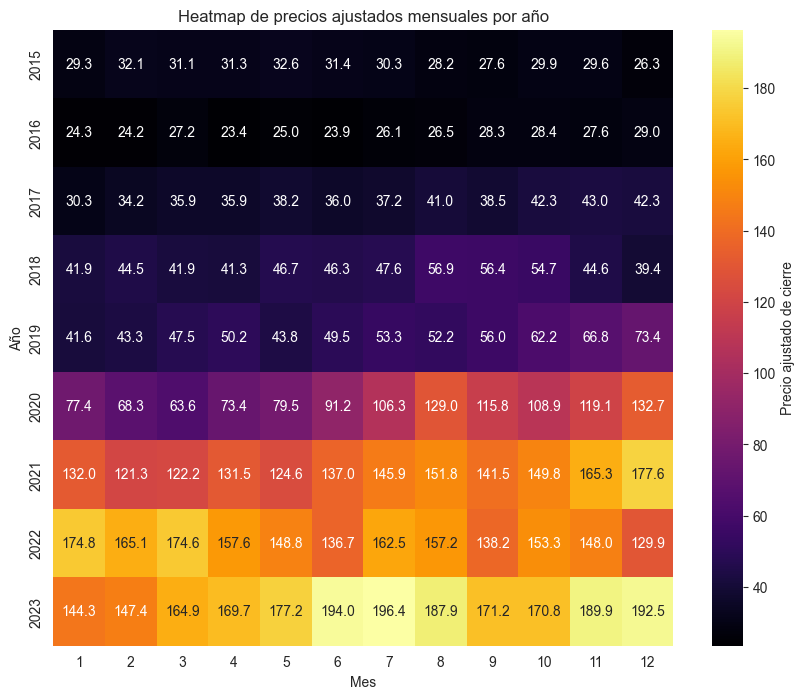

In [17]:
# Crear una tabla pivote con los años como filas y los meses como columnas
pivot_table = data.pivot(index = "year", columns = "month", values = "AAPL")

# Generar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="inferno", cbar_kws={'label': 'Precio ajustado de cierre'})
plt.title('Heatmap de precios ajustados mensuales por año')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.show()

#### **`1.5. Análisis de Rezagos`**

En la estimacion de series de tiempo, los rezagos o `lag`, son simplemente valores pasados de una serie. Ejemplo: si tenemos una serie diaria, el rezago 1 de la serie, corresponde al dia de ayer, el rezago 2 corresponde a ante ayer y asi sucesivamente. Basicamente, el analisis de rezagos se basa en el cálculo de correlaciones entre la serie y una versión rezagada de la propia serie, a esto llamamos `autocorrelación`. Para una versión $k$ rezagos , definimos la función de `autocorrelación` como:

$$
r_k = \frac{\sum_{t=k+1}^{T}(y_t - \bar{y})(y_{t-k}-\bar{y})}{\sum_{t=1}^{T}(y_t - \bar{y})^2}
$$

Los coeficientes de `autocorrelación` forman la `función de autocorrelación (ACF)` para la serie, esto es simplemente un gráfico que representa el coeficiente de autocorrelación frente al número de retrasos tomados en consideración.

Cuando los datos tienen una tendencia, las autocorrelaciones para pequeños retrasos suelen ser grandes y positivas porque las observaciones cercanas en el tiempo también están cerca en valor. Cuando los datos muestran estacionalidad, los valores de autocorrelación serán mayores en correspondencia con los retrasos estacionales (y múltiplos del período estacional) que para otros retrasos. Los datos con tendencia y estacionalidad mostrarán una combinación de estos efectos.

En la práctica, una función más útil es la `función de autocorrelación parcial (PACF)`. Es similar al ACF, excepto que solo muestra la autocorrelación directa entre dos retrasos. Por ejemplo, la autocorrelación parcial para el retraso 3 se refiere a la única correlación que el retraso 1 y 2 no explican. En otras palabras, la `correlación parcial se refiere al efecto directo que un cierto retraso tiene en el valor de tiempo actual`.

In [18]:
# Funcion que genera ACF y PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf(serie, lags = None):

  # Configuro la figura a mostrar como subplots
  fig, axes = plt.subplots(1, 2, figsize=(11,5))

  # Grafico ACF
  plot_acf(serie, lags = lags, ax = axes[0], title = '(ACF)', zero = False)

  # Grafico PACF
  plot_pacf(serie, lags = lags, ax = axes[1], title = '(PACF)', zero = False)

  # Visualiza
  plt.tight_layout()
  plt.show()

In [19]:
data.head()

,Date,AAPL,year,month
0,2015-01-31 00:00:00+00:00,29.290001,2015,1
1,2015-02-28 00:00:00+00:00,32.115002,2015,2
2,2015-03-31 00:00:00+00:00,31.107500,2015,3
3,2015-04-30 00:00:00+00:00,31.287500,2015,4
4,2015-05-31 00:00:00+00:00,32.570000,2015,5


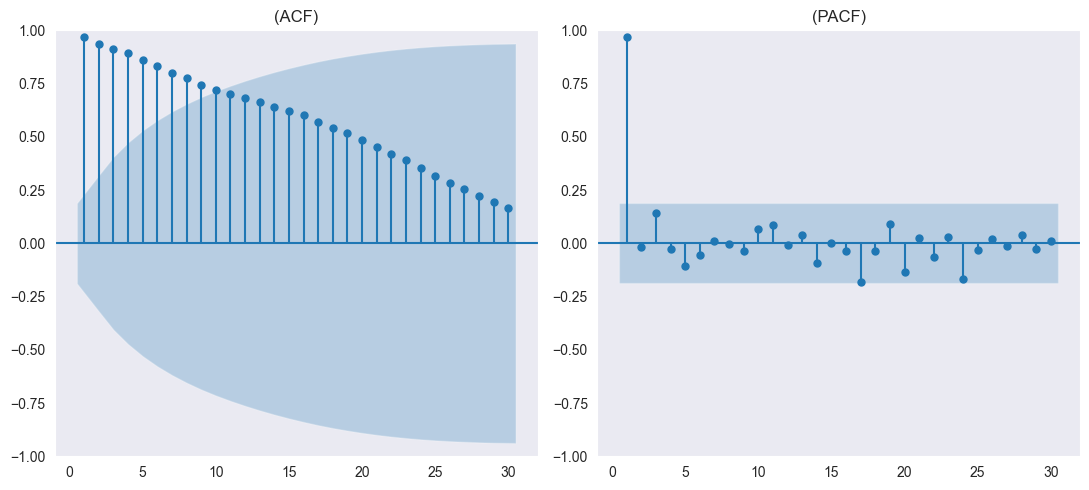

In [20]:
plot_acf_pacf(data['AAPL'], lags = 30)

#### **`1.6. Análisis de Correlaciones`**

La correlación mide la relación lineal entre dos variables numéricas. Si dos variables tienen una correlación fuerte, un cambio en una de ellas estará asociado con un cambio en la otra. La correlación varía entre -1 y 1.

Tipos de correlación:

* **`Correlación de Pearson`** Mide la relación lineal entre dos variables cuantitativas, es decir, asume que la relación de las variables es lineal. Es sensible a valores atípicos. 

* **`Correlación de Spearman`** Es una medida de la relación monótona entre dos variables, basada en rangos (no requiere relación lineal). Es más robusta frente a valores atípicos y es útil para datos que no tienen una distribución normal.

* **`Correlación de Kendall`** También mide relaciones monótonas y se basa en pares ordenados. Es menos común, pero es útil cuando se tiene un conjunto de datos pequeño o cuando se espera ruido en los datos.



In [21]:
# Conjunto de Tickers para construir el Portafolio
tickers = ['IR', 'EXC', 'APH', 'LOW', 'JPM', 'SBUX',
           'DHI', 'MCHP', 'NTRS', 'CNP', 'M', 'O', 'CMI',
           'EQT', 'ECL', 'HRB', 'GM', 'NOV', 'SWK',
           'UNP', 'COF', 'CMS', 'EMN', 'AAPL']

# Ordeno los Tickers 
tickers.sort()

# Guardo el total de Tickers 
n = len(tickers)

start = '1999-12-01' # fecha inicio 
end = '2019-12-31'   # fecha termino 

# Descarga de Series historias (Precios de Cierre)
data = yf.download(tickers, start = start, end = end)["Adj Close"]

# Agrupa los datos en intervalos de tiempo mensuales.
data = data.resample('ME').last()

# Genera los Retornos logaritmicos
returns = data.pct_change().dropna()

[*********************100%***********************]  24 of 24 completed


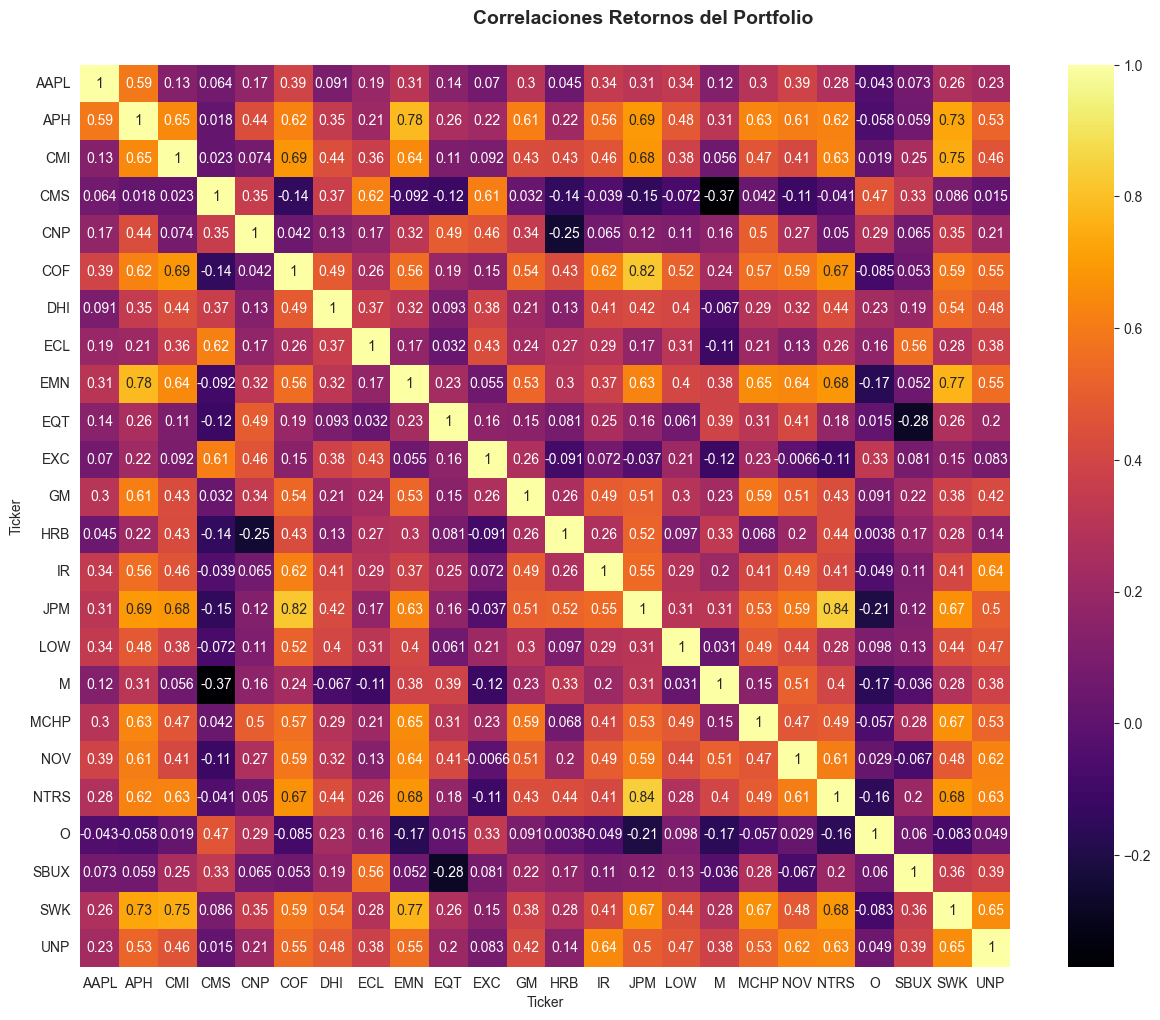

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(15, 11))
corr = returns.corr()
sns.heatmap(corr, ax = ax, cmap = 'inferno', annot = True)
fig.subplots_adjust(top = 0.93)
fig.suptitle('Correlaciones Retornos del Portfolio', fontsize = 14, fontweight = 'bold')
plt.show()

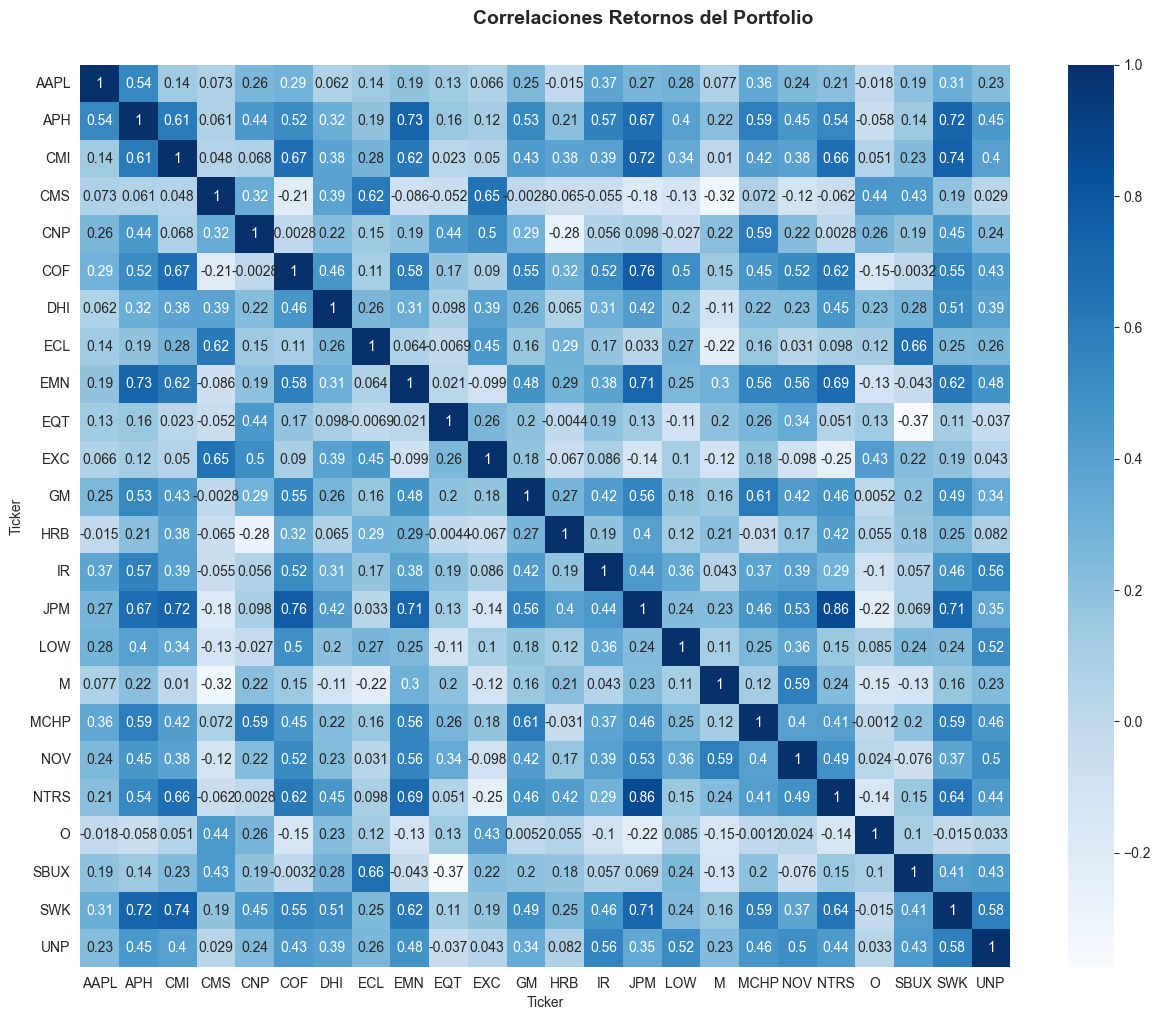

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(15, 11))
corr = returns.corr(method = 'spearman')
sns.heatmap(corr, ax = ax, cmap = 'Blues', annot = True)
fig.subplots_adjust(top = 0.93)
fig.suptitle('Correlaciones Retornos del Portfolio', fontsize = 14, fontweight = 'bold')
plt.show()